Spam Classifier Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
file_path = r"C:\Users\dheka\Downloads\Spam.csv"

df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA 
# 3. Text Preprocessing 
# 4. Model Building
# 4. Evaluation 
# 4. Improvment 
# 4. website 
# 4. Deployment 

1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# Drop Last three Columns 
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis= 1, inplace= True)

In [9]:
df.sample(5)

,v1,v2
3047,ham,Die... Now i have e toot fringe again...
2419,spam,SMS SERVICES For your inclusive text credits p...
3539,ham,"I'll get there at 3, unless you guys want me t..."
414,spam,100 dating service cal;l 09064012103 box334sk38ch
5361,ham,Yep get with the program. You're slacking.


In [10]:
# renaming the columns
df.rename(columns= {"v1": "target", "v2": "text"}, inplace = True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking the missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking the duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# dropping the duplicate values
df.drop_duplicates(keep="first", inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

2. EDA (Exploratory Data Analysis)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

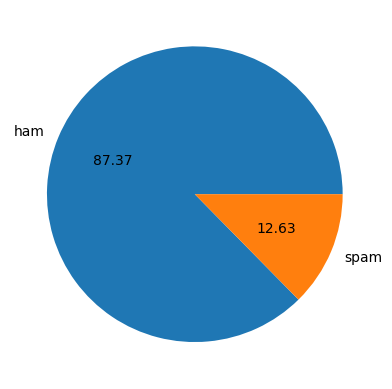

In [21]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct= "%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt', download_dir=r'C:\Users\dheka\OneDrive\Desktop\5.PYTHON_LANGCHAIN\Hugging_face_Langchain\langchain_env\nltk_data')


nltk.download('punkt_tab', download_dir=r'C:\Users\dheka\OneDrive\Desktop\5.PYTHON_LANGCHAIN\Hugging_face_Langchain\langchain_env\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\dheka\OneDrive\Deskt
[nltk_data]     op\5.PYTHON_LANGCHAIN\Hugging_face_Langchain\langchain
[nltk_data]     _env\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\dheka\OneDrive\D
[nltk_data]     esktop\5.PYTHON_LANGCHAIN\Hugging_face_Langchain\langc
[nltk_data]     hain_env\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df["num_characters"] = df["text"].apply(lambda x : len(x))

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# no of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df["num_sentences"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Ham messages
df[df["target"] == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam messages
df[df["target"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


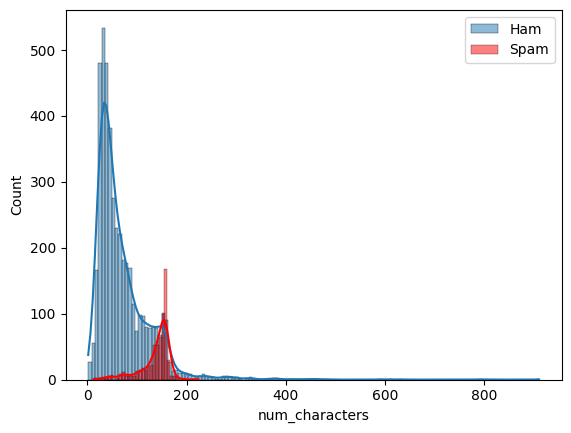

In [ ]:
# plotting historgam for ham & spam messages (with respect to characters)
sns.histplot(df[df["target"] == 0]["num_characters"], kde=True, label='Ham')
sns.histplot(df[df["target"] == 1]["num_characters"], kde=True, color="red", label='Spam')
plt.figure(figsize=(12, 6))

plt.legend()

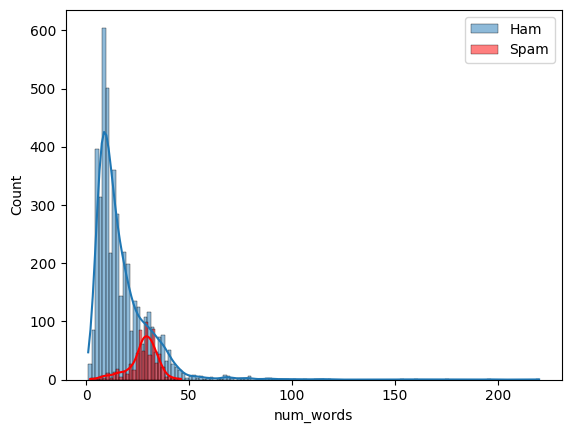

In [34]:
# plotting historgam for ham & spam messages (with respect to num_words)
sns.histplot(df[df["target"] == 0]["num_words"], kde=True, label='Ham')
sns.histplot(df[df["target"] == 1]["num_words"], kde=True, color="red", label='Spam')
plt.Figure(figsize=(12, 6))

plt.legend()

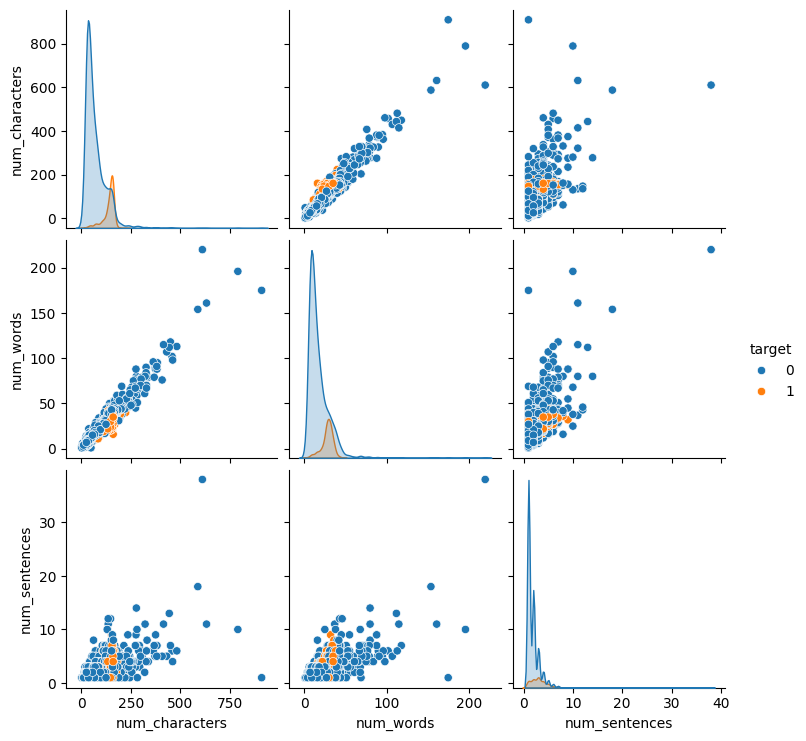

In [35]:
sns.pairplot(df, hue="target")

<Axes: >

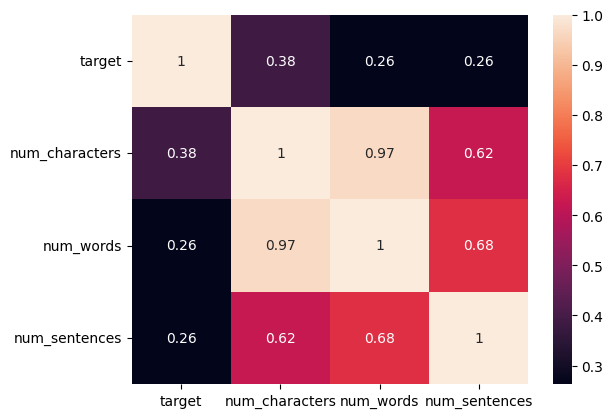

In [36]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

In [73]:
import string
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


# function for text preprocessing
# def transform_text(text):
#     t = text.lower()
#     tokenized = nltk.word_tokenize(t)
    
#     lst = list()
#     for i in tokenized:
#         if i.isalnum():
#             lst.append(i)

#     mst = list()
#     for i in lst:
#         if i not in stopwords.words("english") and i not in string.punctuation:
#             mst.append(i)

#     ps = PorterStemmer()
#     nst = list()
#     for i in mst:
#         nst.append(ps.stem(i))


#     return " ".join(nst)

# another variation of text transform function
def transform_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokenized = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = list()
    for i in tokenized:
        if i not in stop_words:
            words.append(i)

    ps = PorterStemmer()
    stemmed = list()
    for i in words:
        stemmed.append(ps.stem(i))

    cleaned_text = " ".join(stemmed)

    return cleaned_text

In [75]:
sent = "Did you like My Presentation on Ml"
transform_text(sent)


'like present ml'

In [76]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df["transformed_text"] = df["text"].apply(lambda x: transform_text(x))

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [43]:
# plotting the WordCloud plot for spam messages
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

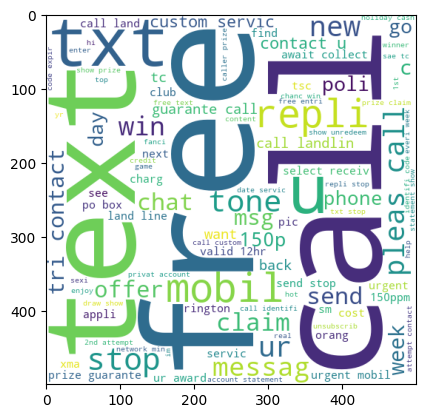

In [44]:
plt.imshow(spam_wc)
plt.Figure(figsize=(15, 6))

In [45]:
# plotting the WordCloud plot for ham messages
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

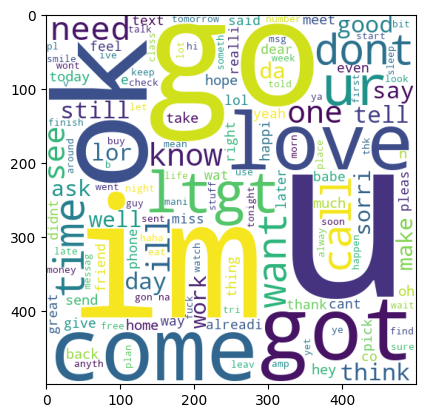

In [46]:
plt.imshow(ham_wc)
plt.Figure(figsize=(15, 6))

In [47]:
# writing code to get the top 30 words in spam messages

spam_corpus = list()
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [48]:
len(spam_corpus)
# spam_corpus[:30]

10813

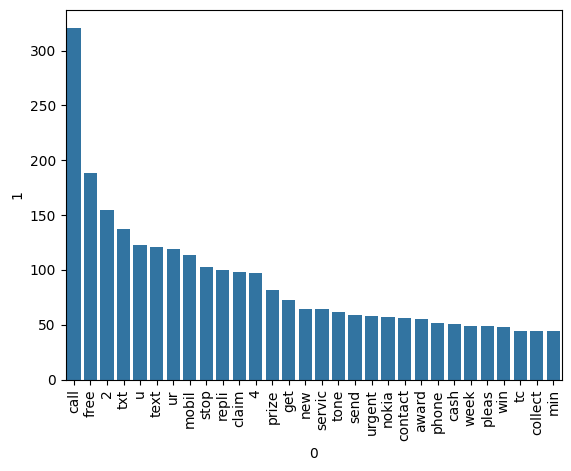

In [49]:
from collections import Counter
spam_corp_dict = Counter(spam_corpus).most_common(30)
temp_spam_df = pd.DataFrame(spam_corp_dict)
sns.barplot(x=temp_spam_df[0], y=temp_spam_df[1])
plt.xticks(rotation="vertical")
plt.show()

In [50]:
# writing code to get the top 30 words in ham messages

ham_corpus = list()
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

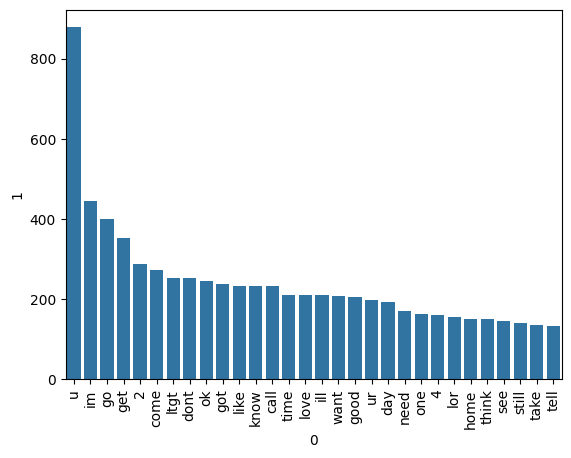

In [51]:
ham_corp_dict = Counter(ham_corpus).most_common(30)
temp_ham_df = pd.DataFrame(ham_corp_dict)
sns.barplot(x=temp_ham_df[0], y=temp_ham_df[1])
plt.xticks(rotation="vertical")
plt.show()

 4.Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# transformed_text ki sparse matrix bana ke uska array banaayenge.
X = tfidf.fit_transform(df["transformed_text"]).toarray()

print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5169, 3000)


In [53]:
Y = df["target"].to_numpy()   
print(type(Y))

<class 'numpy.ndarray'>


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train, y_train)

y_pred1 = gnb.predict(X_test)

print(f"accuracy_score : {accuracy_score(y_test, y_pred1)}")
print(f"confusion_matrix : {confusion_matrix(y_test, y_pred1)}")
print(f"precision_score : {precision_score(y_test, y_pred1)}")


accuracy_score : 0.8733075435203095
confusion_matrix : [[784 112]
 [ 19 119]]
precision_score : 0.5151515151515151


In [59]:
mnb.fit(X_train, y_train)

y_pred2 = mnb.predict(X_test)

print(f"accuracy_score : {accuracy_score(y_test, y_pred2)}")
print(f"confusion_matrix : {confusion_matrix(y_test, y_pred2)}")
print(f"precision_score : {precision_score(y_test, y_pred2)}")

accuracy_score : 0.9748549323017408
confusion_matrix : [[896   0]
 [ 26 112]]
precision_score : 1.0


In [60]:
bnb.fit(X_train, y_train)

y_pred3 = bnb.predict(X_test)

print(f"accuracy_score : {accuracy_score(y_test, y_pred3)}")
print(f"confusion_matrix : {confusion_matrix(y_test, y_pred3)}")
print(f"precision_score : {precision_score(y_test, y_pred3)}")

accuracy_score : 0.9825918762088974
confusion_matrix : [[896   0]
 [ 18 120]]
precision_score : 1.0


In [61]:
# we choose ( tfidf ---> MNB)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score

In [63]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [64]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb
}

In [65]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")

    return acuracy, precision

In [66]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"For {name}")
    print(f"accuracy {current_accuracy}")
    print(f"precision {current_precision}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
accuracy 0.9738878143133463
precision 0.9706249712999955
For KN
accuracy 0.9032882011605415
precision 0.9497991967871486
For NB
accuracy 0.9748549323017408
precision 0.9859002169197397
For DT
accuracy 0.937137330754352
precision 0.892025787255145
For LR
accuracy 0.9535783365570599
precision 0.9443031430934656
For RF
accuracy 0.9748549323017408
precision 0.9747335504403819
For AdaBoost
accuracy 0.9226305609284333
precision 0.8772128060263653
For BgC
accuracy 0.960348162475822
precision 0.9266119160683746
For ETC
accuracy 0.9777562862669246
precision 0.9733117364104487
For GBDT
accuracy 0.9516441005802708
precision 0.9426176049819069
For xgb
accuracy 0.9671179883945842
precision 0.9556009917844719


In [67]:
performance_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values("Precision", ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.974855,0.985900
5,RF,0.974855,0.974734
8,ETC,0.977756,0.973312
0,SVC,0.973888,0.970625
10,xgb,0.967118,0.955601
1,KN,0.903288,0.949799
4,LR,0.953578,0.944303
9,GBDT,0.951644,0.942618
7,BgC,0.960348,0.926612
3,DT,0.937137,0.892026


In [69]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

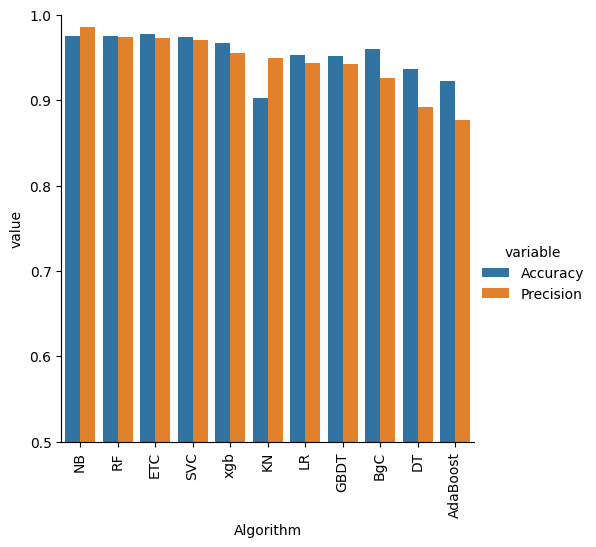

In [70]:
sns.catplot(x= "Algorithm", y="value", hue="variable", data=performance_df1, kind="bar", height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation="vertical")
plt.show()

In [71]:
# model improve
# 1. Change the max_features parameter of tfIdf

In [72]:
tempdf = pd.DataFrame()